In [129]:
import pandas as pd
dataFrame=pd.read_excel("bike_price.xlsx")#read excel

In [130]:
dataFrame

,Price,BikeFeature1,BikeFeature2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [131]:
dataFrame.describe()

,Price,BikeFeature1,BikeFeature2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [132]:
import seaborn as sbn
import matplotlib.pyplot as plt

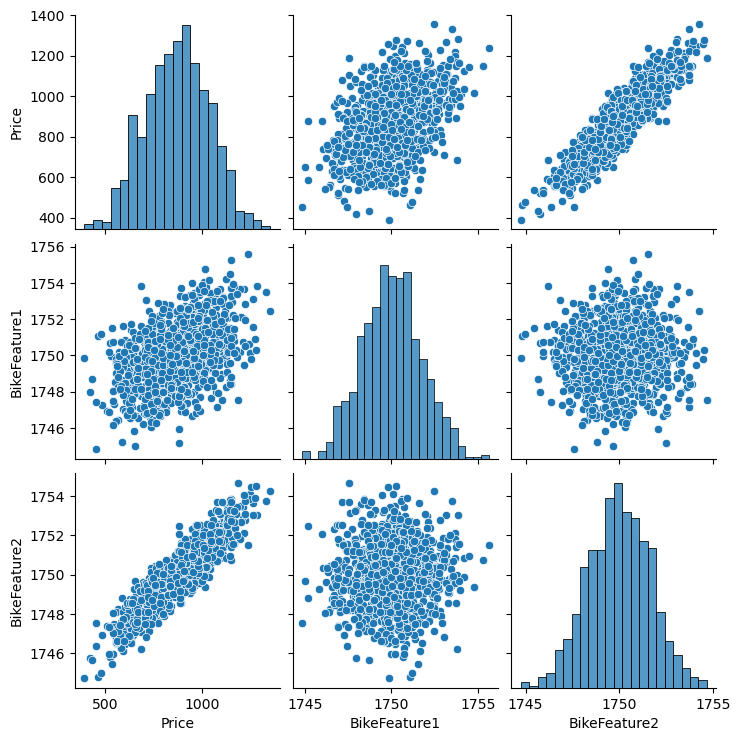

In [133]:
#chart with seaborn
sbn.pairplot(dataFrame)

VERİYİ HAZIRLAMAK

In [134]:
#splitting data into test and train(eğitmek)
from sklearn.model_selection import train_test_split

In [135]:
y=dataFrame["Price"].values
x=dataFrame[["BikeFeature1","BikeFeature2"]].values

In [136]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [137]:
x_train.shape

(670, 2)

In [138]:
y_train.shape

(670,)

In [139]:
#scaling(ölçekleme)

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
scaler=MinMaxScaler()#creating an object in the MinMaxScaler class

In [142]:
scaler.fit(x_train)#BikeFeature1 train data and BikeFeature2 train data 

MinMaxScaler()

In [143]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [144]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [145]:
x_test

array([[ 0.56706914,  0.70743354],
       [ 0.45694459,  0.23213923],
       [ 0.54990366,  0.48049092],
       [ 0.2940838 ,  0.62874574],
       [ 0.25255028,  0.65552399],
       [-0.01410839,  0.26503552],
       [ 0.47207615,  0.58340399],
       [ 0.44645595,  0.66652423],
       [ 0.71271197,  0.47558898],
       [ 0.52327593,  0.65795133],
       [ 0.51589828,  0.35124843],
       [ 0.68132069,  0.46394647],
       [ 0.34838222,  0.66396795],
       [ 0.59835704,  0.66492102],
       [ 0.7743903 ,  0.65539702],
       [ 0.36366154,  0.34590211],
       [ 0.38364758,  0.85598251],
       [ 0.15783877,  0.41240613],
       [ 0.3581219 ,  0.90091814],
       [ 0.54142039,  0.49688287],
       [ 0.49003412,  0.52974122],
       [ 0.61542611,  0.26192082],
       [ 0.5697328 , -0.01882354],
       [ 0.15993374,  0.36593875],
       [ 0.58693437,  0.41410011],
       [ 0.66459019,  0.6746364 ],
       [ 0.37258234,  0.37907714],
       [ 0.37582535,  0.4277929 ],
       [ 0.36091834,

In [146]:
type(x_test)

numpy.ndarray

In [147]:
type(x_train)

numpy.ndarray

MODEL OLUŞTURMAK

In [148]:
from tensorflow.keras.models import Sequential#-->sequential(ardışık)
from tensorflow.keras.layers import Dense #-->lense(yoğun,sık)

In [149]:
#model building
model=Sequential()

#layering
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [150]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 795790.9375
Epoch 2/250
21/21 [==============================] - 0s 573us/step - loss: 795660.5000
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795522.0000
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795359.5625
Epoch 5/250
21/21 [==============================] - 0s 989us/step - loss: 795174.1875
Epoch 6/250
21/21 [==============================] - 0s 961us/step - loss: 794959.2500
Epoch 7/250
21/21 [==============================] - 0s 828us/step - loss: 794712.1250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794430.3125
Epoch 9/250
21/21 [==============================] - 0s 849us/step - loss: 794108.0000
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 793743.8750
Epoch 11/250
21/21 [==============================] - 0s 1000us/step - loss: 793332.1875
Epoch 12/250
21/21 [==============================

In [151]:
model.history.history

{'loss': [795790.9375,
  795660.5,
  795522.0,
  795359.5625,
  795174.1875,
  794959.25,
  794712.125,
  794430.3125,
  794108.0,
  793743.875,
  793332.1875,
  792872.125,
  792356.375,
  791784.875,
  791149.75,
  790449.5,
  789678.25,
  788832.1875,
  787906.8125,
  786894.4375,
  785796.375,
  784603.875,
  783312.0,
  781918.5,
  780414.0,
  778793.9375,
  777050.625,
  775188.5625,
  773201.5,
  771058.3125,
  768776.8125,
  766365.5625,
  763790.9375,
  761053.4375,
  758159.5,
  755081.0,
  751831.25,
  748407.1875,
  744789.625,
  740975.75,
  736966.0,
  732729.3125,
  728288.9375,
  723655.875,
  718778.0,
  713679.125,
  708350.875,
  702761.0,
  696944.1875,
  690870.5625,
  684543.0625,
  677966.75,
  671152.9375,
  664064.625,
  656689.125,
  649005.0,
  641083.4375,
  632901.1875,
  624399.125,
  615629.5625,
  606575.6875,
  597263.0,
  587649.5625,
  577746.125,
  567554.0625,
  557076.25,
  546253.6875,
  535243.4375,
  523941.71875,
  512284.3125,
  500485.0625,
 

In [152]:
type(model.history.history)

dict

In [153]:
#eğer kayılarla bu kayıların olduğu verilerin sayısını bir grafikte gösterirsek
#modelimizin doğruluğu hakkında bir fikir sahibi olabiliriz 

In [154]:
#x=veri sayısı
#y=kayıp miktari
#önce bu dic loss-->list çevirmeliyiz

In [155]:
loss=model.history.history["loss"]

In [156]:
type(loss)

list

<AxesSubplot:>

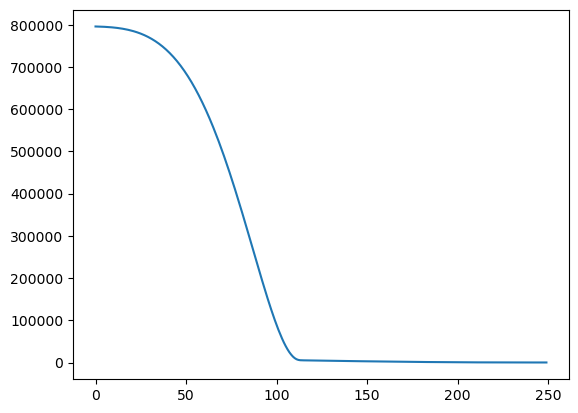

In [157]:
sbn.lineplot(x=range(len(loss)),y=loss)

matplotlib.axes._subplots.AxesSubplot

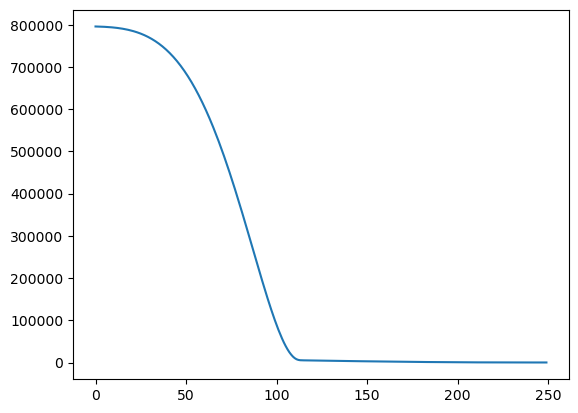

In [158]:
type(sbn.lineplot(x=range(len(loss)),y=loss))

In [159]:
import numpy as np

In [160]:
%matplotlib inline

In [161]:
lossArray1=np.array(loss)

In [162]:
lossArray2=np.array(range(len(loss)))

Text(0.5, 1.0, 'Modelin kayıp oranı ')

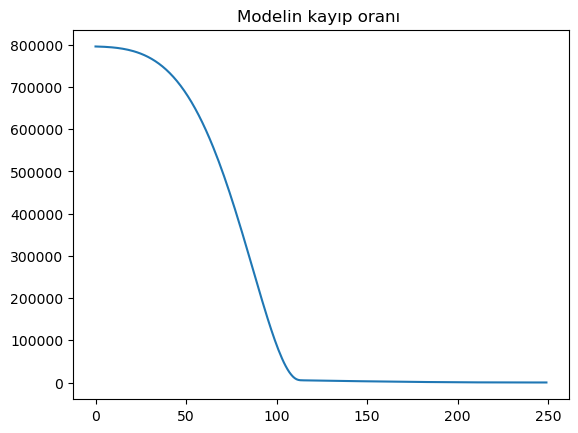

In [163]:
plt.plot(lossArray2,lossArray1)
plt.title("Modelin kayıp oranı ")

TRAINING

In [164]:
#modelin kendi değerlendirmesi
#verbose:yapılacak işlemin detaylarını verbose=1 ile yazdırır ama genelliler verbose=0 olarak kullanılır
#evaluate(değerlendirme) işlemin hem test hem train için uygulayıp iki skor çıkartırsak
#bu iki skor yakın çıkarsa modelin başarılı olduğunu anlarız
trainLoss=model.evaluate(x_train,y_train,verbose=0)#bu loss değerlerini verir yani ne kadar kayıp yaşadığımızı verir
testLoss=model.evaluate(x_test,y_test,verbose=0)

In [165]:
trainLoss

77.3249740600586

In [166]:
testLoss

74.91220092773438

In [167]:
#yukarıdaki değerler bir bisikletin fiyatı için çok olmayan mikltarlar olduğundan 
#buradan modelin başarılı olduğunu anlayabiliriz

MODELİ TAHMİNE DAYALI DEĞERLENDİRMEK


In [168]:
#x=bikefeature1 and bikefeature2
#y=price

In [169]:
#x_test kullanarak tahminler yaptırabiliriz modelimize
#o zaman modele x_test vererek bir tahmin yaptıralım
#bu tahminleri de y_test ile karşılaştırarak modelimizi değerlendirelim

In [170]:
test_tahminleri=model.predict(x_test)

11/11 [==============================] - 0s 1ms/step


In [171]:
test_tahminleri#buradan x_test değerlerini modelimize vererek y değerleri elde ettik
#şimdi model ile elde edilen y değerlerini gerçek y değerleri(y_test) ile karşılaştıralım

array([[1077.5504 ],
       [ 626.7362 ],
       [ 877.1249 ],
       [ 896.25476],
       [ 901.66675],
       [ 457.5256 ],
       [ 932.16907],
       [ 992.2181 ],
       [ 941.1157 ],
       [1017.0816 ],
       [ 752.839  ],
       [ 918.05927],
       [ 948.97986],
       [1054.4512 ],
       [1120.0437 ],
       [ 684.548  ],
       [1127.2428 ],
       [ 655.001  ],
       [1154.8176 ],
       [ 887.53064],
       [ 893.9946 ],
       [ 718.44824],
       [ 460.267  ],
       [ 616.31177],
       [ 836.09796],
       [1090.4545 ],
       [ 716.531  ],
       [ 759.3696 ],
       [ 875.33307],
       [ 772.9394 ],
       [ 456.20276],
       [ 784.5579 ],
       [ 730.77783],
       [ 650.2811 ],
       [ 888.1625 ],
       [ 845.4811 ],
       [1035.6235 ],
       [1023.6939 ],
       [ 846.1408 ],
       [ 863.95306],
       [ 759.1621 ],
       [1174.2281 ],
       [1097.2484 ],
       [1087.3752 ],
       [ 873.46606],
       [ 599.893  ],
       [1146.1876 ],
       [ 974.

In [172]:
type(y_test)

numpy.ndarray

In [173]:
type(test_tahminleri)

numpy.ndarray

In [174]:
#tahminDataFrame=pd.DataFrame([y_test,test_tahminleri],columns=["Gerçek Y","Tahmin Y"])->böyle olunca indexlerde uyumsuzluk oluyor

In [175]:
tahminDataFrame=pd.DataFrame(y_test,columns=["Gerçek Y"])

In [176]:
tahminDataFrame

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [177]:
#şimdi uyuşmazlığı ortadan kaldıralım

In [178]:
test_tahminleri=pd.Series(test_tahminleri.reshape(330,))

In [179]:
#şimdi iki kolonu birleştirelim

In [180]:
tahminDataFrame=pd.concat([tahminDataFrame,test_tahminleri],axis=1)

In [181]:
tahminDataFrame

,Gerçek Y,0
0,1081.652164,1077.550415
1,622.675990,626.736206
2,889.356810,877.124878
3,902.826733,896.254761
4,897.662404,901.666748
...,...,...
325,1028.438035,1013.567139
326,789.934950,793.358215
327,758.490486,767.644043
328,1172.871659,1166.388184


In [182]:
#kolonu isimlendirelim

In [183]:
tahminDataFrame.columns=["Gerçek Y","Tahmin Y"]

In [184]:
tahminDataFrame

,Gerçek Y,Tahmin Y
0,1081.652164,1077.550415
1,622.675990,626.736206
2,889.356810,877.124878
3,902.826733,896.254761
4,897.662404,901.666748
...,...,...
325,1028.438035,1013.567139
326,789.934950,793.358215
327,758.490486,767.644043
328,1172.871659,1166.388184


In [185]:
tahminDataFrame.describe()

,Gerçek Y,Tahmin Y
count,330.000000,330.000000
mean,863.895735,863.646790
std,164.649126,163.464127
min,390.856887,406.326630
25%,745.553041,746.868454
50%,878.239496,878.978516
75%,979.817018,978.208008
max,1355.213745,1346.697754


In [186]:
#şimdi bu iki kolonu bir grafikte gösterelim

<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

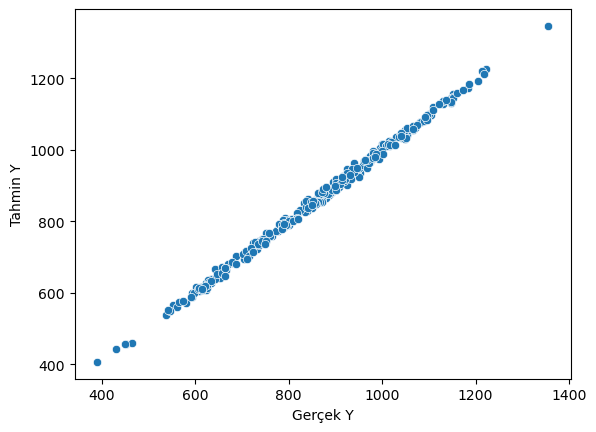

In [187]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahminDataFrame)

In [188]:
#şimdi hata miktarlarına bakalım:

In [189]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [190]:
mean_absolute_error(tahminDataFrame["Gerçek Y"],tahminDataFrame["Tahmin Y"])

6.905340578361742

In [191]:
mean_squared_error(tahminDataFrame["Gerçek Y"],tahminDataFrame["Tahmin Y"])

74.91220296221769

In [192]:
#şimdi dışarıdan girdiğimiz x değerleri için modelimiz hangi y değerini üretecek ona bakalım

In [193]:
newBikeFeature=[[1751,1750],[1234,1290]]

In [194]:
newBikeFeature=scaler.transform(newBikeFeature)

In [195]:
model.predict(newBikeFeature)

1/1 [==============================] - 0s 18ms/step


array([[915.10803],
       [178.52573]], dtype=float32)

In [196]:
#modelimizi nasıl kaydederiz

In [197]:
from tensorflow.keras.models import load_model

In [198]:
model.save("bike_model.h5")#uzantıya dikkat et

In [199]:
#eğer modeli sonradan çağırıp bir özellik üzerine uygulamak istersek

In [200]:
sonradanCagirma=load_model("bike_model.h5")

In [201]:
sonradanCagirma.predict(newBikeFeature)

1/1 [==============================] - 0s 48ms/step


array([[915.10803],
       [178.52573]], dtype=float32)